In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import REfunctions as REf
import os
import pathlib
import matplotlib.pyplot as plt
import altair

In [28]:
# name the file we want
target_file = 'research1.csv'

# designate the path of the file
curr_file = pathlib.Path.cwd()

# join them
tar_path = curr_file.joinpath(target_file)

# load the file
print(tar_path)

c:\Users\doria\OneDrive\Documents\GitHub_Files\real_estate_neighborhood\MLS\research1.csv


In [47]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import REfunctions as REf

mls_data = pd.read_csv(tar_path)
# mls_data = mls_data.dropna(subset=['Baths']) 
# mls_data = mls_data.dropna(subset=['Beds']) 
mls_data.drop(mls_data[mls_data['Status'] == 'C/S'].index, inplace = True) 
REf.drop_zero_bed_bath(mls_data)
mls_data = mls_data[mls_data['Beds'] !=0]
REf.setdate(mls_data)
end_date =  mls_data['date'].max()
REf.get_end_date(mls_data)
mls_data = mls_data.rename(columns={'Current Price':'price',
                                    'List Price':'list_price',
                                    'Price/SqFt':'pricePsqft', 
                                    'Original List Price':'ogPrice',
                                    'Structure Type':'home_type',
                                    'Building Name':'building_name',
                                    'Selling Office Name':'selling_office',
                                    'Total SQFT':'total_sqft',
                                    'Year Built':'year_built',
                                    'Zip Code':'zip',
                                    'Legal Subdivision':'subdivision',
                                    'Above Grade Finished SQFT':'above_grade_sqft',
                                    'List Agent Full Name':'list_agent',
                                    'Selling Agent Full Name':'selling_agent',
                                    'List Office Name':'office'})

REf.fixbath(mls_data)
REf.fix_nums(mls_data)
REf.make_price_bins(mls_data)
REf.make_sqft_bins(mls_data)
REf.fix_status(mls_data)
REf.create_date_cols(mls_data)
# drop strange outlier property from 2014
mls_data = mls_data.drop([mls_data[mls_data['year'] == 2014].index[0]])
mls_data = mls_data.drop([mls_data[mls_data['MLS #'] == '1009934038'].index[0]])

REf.get_ab_rate(mls_data)
REf.make_col_absorption(mls_data)
# REf.process_df(mls_data,end_date)
days_back=30
a,m,act,clsd,cont,start,end =REf.get_ab_rate(mls_data)
print('Report Covers the latest',days_back,'days :',start.date(), 'to',end.date())
print('Current Active Listings :',act)
print('Closed Contracts over',days_back,'day period :',clsd)
print('Active Under Contract or Pending :',cont)
print(days_back, 'day absorbtion rate :',round(a,2),'%')
print(round((cont/(cont+act)),2)*100,'%','of listings are under Contract')
print('Months of inventory on hand :',m,'(i.e.', round(m*30,2), 'days)')

Report Covers the latest 30 days : 2022-08-09 to 2022-09-08
Current Active Listings : 39
Closed Contracts over 30 day period : 56
Active Under Contract or Pending : 44
30 day absorbtion rate : 67.0 %
53.0 % of listings are under Contract
Months of inventory on hand : 0.7 (i.e. 21.0 days)


In [48]:
mls_data[['year_month','space_bin','price']].groupby(['year_month','space_bin'], as_index=False).mean().head()

,year_month,space_bin,price
0,2017-09,A_0-1K,4.190389e+05
1,2017-09,B_1.0K-1.5K,5.946429e+05
2,2017-09,C_1.5k-2K,7.816650e+05
3,2017-09,D_2K+,1.349954e+06
4,2017-10,A_0-1K,3.560357e+05


In [49]:
df_last_30 = REf.last_x_days(mls_data,30)
df_last_30.head()

,MLS #,Cat,Status,Address,City,County,Beds,Baths,home_type,price,...,office,date,price_range,space_bin,month,year,year_month,m_y_bin,absorb,mon_inv
4345,VAAX2014688,CLS,CLS,801 N Pitt St #808,Alexandria,"Alexandria City, VA",1.0,1,Unit/Flat/Apartment,309000.0,...,"Long & Foster Real Estate, Inc. (LNG183)",2022-08-10,$250k-$349k,A_0-1K,8,2022,2022-08,2022-08_$250k-$349k,180.0,0.11
4346,VAAX2015718,CON,PND,132 Roberts Ln #200,Alexandria,"Alexandria City, VA",1.0,1,Unit/Flat/Apartment,325000.0,...,Compass (COMPS7),2022-08-10,$250k-$349k,A_0-1K,8,2022,2022-08,2022-08_$250k-$349k,180.0,0.11
4347,VAAX2013116,CON,A/C,501 Slaters Ln #1111,Alexandria,"Alexandria City, VA",2.0,2,Unit/Flat/Apartment,585000.0,...,"McEnearney Associates, Inc. (MCE1)",2022-08-10,$550k-$649k,B_1.0K-1.5K,8,2022,2022-08,2022-08_$550k-$649k,58.0,0.86
4348,VAAX2015624,ACT,ACT,127 Hilton St,Alexandria,"Alexandria City, VA",4.0,2.0,Detached,739900.0,...,Compass (COMPS8),2022-08-10,$650k-749k,B_1.0K-1.5K,8,2022,2022-08,2022-08_$650k-749k,50.0,0.75
4349,VAAX2014130,CLS,CLS,323 N Columbus St,Alexandria,"Alexandria City, VA",4.0,3.2,Interior Row/Townhouse,2130000.0,...,"Long & Foster Real Estate, Inc. (LNG183)",2022-08-10,$950k+,D_2K+,8,2022,2022-08,2022-08_$950k+,77.0,0.79


<AxesSubplot:xlabel='space_bin', ylabel='price'>

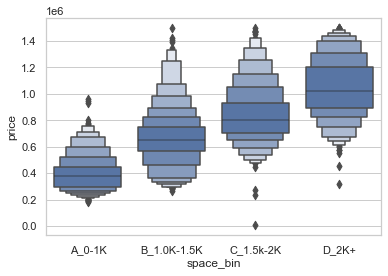

In [50]:
import seaborn as sns

mls_data['space_bin'].unique()
trim_1_half = mls_data[(mls_data.price <1500000)]

sns.set_theme(style="whitegrid")

# diamonds = sns.load_dataset("diamonds")
clarity_ranking = ['A_0-1K','B_1.0K-1.5K','C_1.5k-2K', 'D_2K+']

sns.boxenplot(x="space_bin", y="price",
              color="b", order=clarity_ranking,
              scale="linear", data=trim_1_half)

In [51]:
import altair as alt
# from altair_save import save

last_month_count = df_last_30[['Cat','price_range','price']].groupby(['Cat','price_range']).count()
last_month_count.reset_index(level=0, inplace=True)
last_month_count.reset_index(level=0, inplace=True)

last_month_count = last_month_count.rename(columns={'price_range':'Price Ranges',
                                                    'Cat':'Status',
                                                    'price':'Status Count'}) 
source = last_month_count

alt.Chart(source).mark_bar().encode(
    x='Status:O',
    y='Status Count:Q',
    color='Status:N',
    column='Price Ranges:N'
)



alt.Chart(...)

In [52]:
# month_count = mls_data[['m_y','space_bin','price']].groupby(['m_y','space_bin']).mean()
month_count = mls_data[['year_month','space_bin','price']].groupby(['year_month','space_bin']).mean()

month_count.reset_index(level=0, inplace=True)
month_count.reset_index(level=0, inplace=True)


print(month_count.head())


     space_bin year_month         price
0       A_0-1K    2017-09  4.190389e+05
1  B_1.0K-1.5K    2017-09  5.946429e+05
2    C_1.5k-2K    2017-09  7.816650e+05
3        D_2K+    2017-09  1.349954e+06
4       A_0-1K    2017-10  3.560357e+05


In [53]:
month_count = mls_data[['year_month','space_bin','price']].groupby(['year_month','space_bin']).mean()

month_count.reset_index(level=0, inplace=True)
month_count.reset_index(level=0, inplace=True)
# month_count['year_month'] = month_count['date'].dt.strftime("%Y-%m")

month_count = month_count.rename(columns={'space_bin':'SqFt Ranges',
                                                    'year_month':'Date',
                                                    'price':'Average Price'}) 
source = month_count

alt.Chart(source).mark_bar().encode(
    x='SqFt Ranges:N',
    y='Average Price:Q',
    color='SqFt Ranges:N',
    column='Date:O' 
)

alt.Chart(...)

In [54]:
month_count = mls_data[['year_month','space_bin','pricePsqft']].groupby(['year_month','space_bin']).mean()

month_count.reset_index(level=0, inplace=True)
month_count.reset_index(level=0, inplace=True)
# month_count['year_month'] = month_count['date'].dt.strftime("%Y-%m")

month_count = month_count.rename(columns={'space_bin':'SqFt Ranges',
                                                    'year_month':'Date',
                                                    'pricePsqft':'Avg_PirceperSqFt'}) 
source = month_count

alt.Chart(source).mark_bar().encode(
    x='SqFt Ranges:N',
    y='Avg_PirceperSqFt:Q',
    color='SqFt Ranges:N',
    column='Date:O' 
)

alt.Chart(...)

In [45]:
mls_data[mls_data['pricePsqft'] > 740000.000000]

,MLS #,Cat,Status,Address,City,County,Beds,Baths,home_type,price,...,office,date,price_range,space_bin,month,year,year_month,m_y_bin,absorb,mon_inv
1142,1009934038,CLS,CLS,148 Union St,Alexandria,"Alexandria City, VA",2.0,2.0,Interior Row/Townhouse,750000.0,...,"Washington Fine Properties, LLC (WFP4)",2019-01-25,$750k-849k,A_0-1K,1,2019,2019-01,2019-01_$750k-849k,45.0,0.6


In [ ]:
month_count = mls_data[['year_month','space_bin','pricePsqft']].groupby(['year_month','space_bin']).mean()

month_count.reset_index(level=0, inplace=True)
month_count.reset_index(level=0, inplace=True)
# month_count['year_month'] = month_count['date'].dt.strftime("%Y-%m")

month_count = month_count.rename(columns={'space_bin':'SqFt Ranges',
                                                    'year_month':'Date',
                                                    'pricePsqft':'Avg_PirceperSqFt'}) 
source = month_count

alt.Chart(source).mark_bar().encode(
    x='SqFt Ranges:N',
    y='Avg_PirceperSqFt:Q',
    color='SqFt Ranges:N',
    column='Date:O' 
)

In [55]:

month_sale = mls_data[['price','date','space_bin','year','pricePsqft','year_month']]
# month_sale['year_month'] = month_sale['date'].dt.strftime("%Y-%m")
month_sale.head()


,price,date,space_bin,year,pricePsqft,year_month
1,690000.0,2017-09-11,A_0-1K,2017,737.97,2017-09
2,640000.0,2017-09-11,A_0-1K,2017,682.30,2017-09
3,990000.0,2017-09-11,D_2K+,2017,320.60,2017-09
4,325000.0,2017-09-12,A_0-1K,2017,480.77,2017-09
5,259900.0,2017-09-12,A_0-1K,2017,383.33,2017-09


In [56]:
pd.crosstab(mls_data.year_month, mls_data.space_bin,
          aggfunc=np.mean, values=mls_data.price)

space_bin,A_0-1K,B_1.0K-1.5K,C_1.5k-2K,D_2K+
year_month,,,,
2017-09,419038.888889,594642.857143,7.816650e+05,1.349954e+06
2017-10,356035.714286,558459.090909,7.237980e+05,1.209929e+06
2017-11,336130.769231,557543.529412,7.427856e+05,1.414247e+06
2017-12,358842.857143,548385.714286,7.311508e+05,1.072474e+06
2018-01,378743.000000,621276.923077,8.254419e+05,1.249750e+06
...,...,...,...,...
2022-05,441916.956522,749830.434783,1.157704e+06,1.491636e+06
2022-06,444377.777778,797583.863636,1.136900e+06,1.507317e+06
2022-07,447023.809524,821347.272727,1.086473e+06,1.240869e+06


In [57]:
month_smean = month_sale[['year_month','space_bin','pricePsqft']].groupby(['year_month','space_bin'], as_index=False).mean()
month_smean.head()

,year_month,space_bin,pricePsqft
0,2017-09,A_0-1K,506.051111
1,2017-09,B_1.0K-1.5K,510.011429
2,2017-09,C_1.5k-2K,491.791667
3,2017-09,D_2K+,470.467692
4,2017-10,A_0-1K,470.840000


In [58]:
month_pmean = month_sale[['year_month','space_bin','price']].groupby(['year_month','space_bin'], as_index=False).mean()

month_smean = month_sale[['year_month','space_bin','pricePsqft']].groupby(['year_month','space_bin'], as_index=False).mean()


# month_sale = mls_data[['price','date','space_bin','year']]
chart1 = alt.Chart(month_pmean).mark_circle().encode(
    x='year_month:T',
    y='price:Q',
    color='space_bin:N'
).properties(
    height=300,
    width=300
)
# + base.transform_loess('year_month', 'y', groupby=['size']).mark_line(size=4)
#
chart2 = alt.Chart(month_pmean).mark_bar().encode(
    x='count()',
    y=alt.Y('price:Q',bin=alt.Bin(maxbins=30)),
    color='space_bin:N'
).properties(
    height=300,
    width=100
)

chart1 | chart2
# chart1 + chart1.transform_loess('year_month:T', 'price:Q',groupby=np.array(sqft_bins)).mark_line(size=4)


alt.HConcatChart(...)

In [59]:
month_sale = mls_data[['price','date','space_bin','year','pricePsqft','year_month']]

line = alt.Chart(month_sale).mark_line().encode(
    x='year_month',
    y='mean(price)'
).properties(
    height=300,
    width=800
)

band = alt.Chart(month_sale).mark_errorband(extent='ci').encode(
    x='year_month',
    y=alt.Y('price', title='Price Range'),
).properties(
    height=300,
    width=800
)

band + line

alt.LayerChart(...)

In [60]:
from vega_datasets import data

source = data.iris()

alt.Chart(source).transform_fold(
    ['petalWidth', # sqft bins
     'petalLength',
     'sepalWidth',
     'sepalLength'],
    as_ = ['Measurement_type', 'value']
).transform_density(
    density='value', # total sqft
    bandwidth=0.3,
    groupby=['Measurement_type'], # sqft bin
    extent= [0, 8]
).mark_area().encode(
    alt.X('value:Q'), #sqft
    alt.Y('density:Q'),
    alt.Row('Measurement_type:N') 
).properties(width=300, height=50)

alt.Chart(...)

In [61]:
data.iris().head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
sale_density = mls_data[['price','date','price_range','space_bin','year','pricePsqft','year_month','total_sqft']]
# sale_density.head()

In [63]:
month_pmean.head()

,year_month,space_bin,price
0,2017-09,A_0-1K,4.190389e+05
1,2017-09,B_1.0K-1.5K,5.946429e+05
2,2017-09,C_1.5k-2K,7.816650e+05
3,2017-09,D_2K+,1.349954e+06
4,2017-10,A_0-1K,3.560357e+05


In [64]:
test1 = sale_density[['year_month','space_bin','price']].groupby(['year_month','space_bin']).mean()
test1.reset_index(level=0, inplace=True)
test1.reset_index(level=0, inplace=True)

test2=pd.crosstab(mls_data.year_month, mls_data.space_bin,
          aggfunc=np.mean, values=mls_data.price)

sourceMine = pd.DataFrame({
    'x': test2.index,
    'A_low': list(test2['A_0-1K']),
    'B': list(test2['B_1.0K-1.5K']),
    'C': list(test2['C_1.5k-2K']),
    'D': list(test2['D_2K+']),
})

base = alt.Chart(sourceMine).mark_circle(opacity=0.5).transform_fold(
    fold=['A_low', 'B', 'C','D'],
    as_=['category', 'y']
).encode(
    alt.X('x:T'),
    alt.Y('y:Q'),
    alt.Color('category:N')
)

chart2 = alt.Chart(month_pmean).mark_bar().encode(
    x='count()',
    y=alt.Y('price:Q',bin=alt.Bin(maxbins=25)),
    color='space_bin:N'
).properties(
    height=300,
    width=100
)

# base
base + base.transform_loess('x', 'y', groupby=['category'],bandwidth=.4).mark_line(size=4) | chart2

alt.HConcatChart(...)

In [65]:
test2

space_bin,A_0-1K,B_1.0K-1.5K,C_1.5k-2K,D_2K+
year_month,,,,
2017-09,419038.888889,594642.857143,7.816650e+05,1.349954e+06
2017-10,356035.714286,558459.090909,7.237980e+05,1.209929e+06
2017-11,336130.769231,557543.529412,7.427856e+05,1.414247e+06
2017-12,358842.857143,548385.714286,7.311508e+05,1.072474e+06
2018-01,378743.000000,621276.923077,8.254419e+05,1.249750e+06
...,...,...,...,...
2022-05,441916.956522,749830.434783,1.157704e+06,1.491636e+06
2022-06,444377.777778,797583.863636,1.136900e+06,1.507317e+06
2022-07,447023.809524,821347.272727,1.086473e+06,1.240869e+06


In [66]:
source = pd.DataFrame({
    'x': test2.index,
    'A': list(test2['A_0-1K']),
    'B': list(test2['B_1.0K-1.5K']),
    'C': list(test2['C_1.5k-2K']),
    'D': list(test2['D_2K+']),
})

alt.Chart(source).transform_fold(
    ['A','B','C','D'],
    as_ = ['Measurement_type', 'value']
).transform_density(
    density='value', # total sqft
    bandwidth=100000,
    groupby=['Measurement_type'], # sqft bin
    extent= [400000, 2000000]
).mark_area().encode(
    alt.X('value:Q'), #sqft
    alt.Y('density:Q'),
    alt.Row('Measurement_type:N') 
).properties(width=300, height=50)

alt.Chart(...)

In [67]:
sourceMine.head()

,x,A_low,B,C,D
0,2017-09,419038.888889,594642.857143,781665.000000,1.349954e+06
1,2017-10,356035.714286,558459.090909,723798.000000,1.209929e+06
2,2017-11,336130.769231,557543.529412,742785.555556,1.414247e+06
3,2017-12,358842.857143,548385.714286,731150.769231,1.072474e+06
4,2018-01,378743.000000,621276.923077,825441.916667,1.249750e+06


In [68]:
source.head()

,x,A,B,C,D
0,2017-09,419038.888889,594642.857143,781665.000000,1.349954e+06
1,2017-10,356035.714286,558459.090909,723798.000000,1.209929e+06
2,2017-11,336130.769231,557543.529412,742785.555556,1.414247e+06
3,2017-12,358842.857143,548385.714286,731150.769231,1.072474e+06
4,2018-01,378743.000000,621276.923077,825441.916667,1.249750e+06


In [69]:
month_pmean.head()
month_pmean['dateT'] = pd.to_datetime(month_pmean.year_month,format="%Y-%m")
month_pmean.head()


,year_month,space_bin,price,dateT
0,2017-09,A_0-1K,4.190389e+05,2017-09-01
1,2017-09,B_1.0K-1.5K,5.946429e+05,2017-09-01
2,2017-09,C_1.5k-2K,7.816650e+05,2017-09-01
3,2017-09,D_2K+,1.349954e+06,2017-09-01
4,2017-10,A_0-1K,3.560357e+05,2017-10-01


In [70]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(month_pmean, x="dateT", y="price", color="space_bin", marginal_y="box",
            trendline="ols", template="simple_white")
fig.show()

In [41]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.plotting import ColumnDataSource

data = ColumnDataSource(df_last_30)

plot = figure(x_axis_type='datetime',x_axis_label = 'Date', y_axis_label='Sales')

plot.circle(x='date',y='price',source=data, color='blue', width=0.5)
# output_file('pandas_bins.html')
show(plot)

